In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../python')
from measurements import *

plotter = Plotter()

from fitv2 import *


import h5py


from scipy.optimize import curve_fit
from scipy.integrate import quad

from scipy.interpolate import interp1d
from scipy.optimize import minimize 


processedDataDir = "../data/processedv4/"
processedDataDir = "../python/"

gdir = '../gnuplot_data/'

%load_ext gnuplot_kernel


dt=0.72
chi0 = 5.0

In [3]:
data = ConfResults(fn="../data/zcritical_N080_m-0481100_h006000_c00500.h5",thTime=1000,dt=dt*0.9398, data_format="new", processedDir=processedDataDir, plotDir=gdir)

In [146]:
data.load("OtOttp","A", direc=processedDataDir)
for k in range(1,10):
    data.load("OtOttp","Akk{}".format(k), direc=processedDataDir)
    

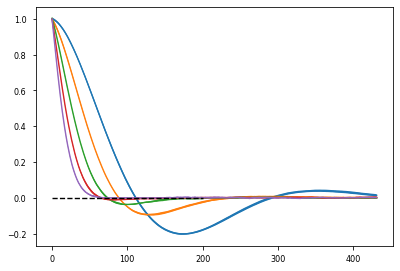

In [5]:
for k in range(1,6):
    plotter.plot(data,"OtOttp","Akk{}".format(k),tMax = 600, yfact = 1.0 / 5.0)
#plotter.plot(dataminus,"OtOttp","dsigma",tMax = 2200, yfact = 1.0 / np.real(dataminus.OtOttp['dsigma'].mean[0]))
plt.plot([0,200],[0,0],'--k')

In [26]:
5.0 / 6.0

0.8333333333333334

In [263]:
fitter= dict()

fitter["Akk1"] = Fitter(data, chi0 = chi0, chiperp = 1, L=80, k = 1)

In [264]:
fitter["Akk1"].setParValues("OtOttp", "Akk1", [10,1,0.1])

In [265]:
fitter["Akk1"].fit("OtOttp", "Akk1", maxInd=700)

(837642.7835653255,
 1201.7830467221313,
 697,
 <ValueView a=0.003422776551083029 b=0.015947179553936763 c=1.3941381382664986e-10>)

[0.003422776551083029, 0.015947179553936763, 1.3941381382664986e-10]


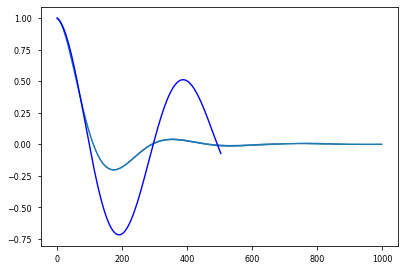

In [266]:
plotter.plot(data,"OtOttp","Akk{}".format(1),tMax = 20000, yfact = 1.0 / 5.0)
fitter["Akk1"].plot("OtOttp", "Akk1")

KeyError: 'Akk10'

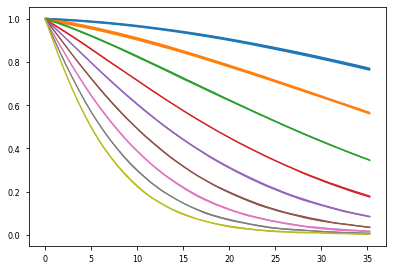

In [244]:
for k in range(1,20):
    plotter.plot(data,"OtOttp","Akk{}".format(k),tMax = 50, yfact = 1 / 5.0 )
#plotter.plot(dataminus,"OtOttp","dsigma",tMax = 2200, yfact = 1.0 / np.real(dataminus.OtOttp['dsigma'].mean[0]))
plt.plot([0,35],[0,0],'--k')